# Tutorial 2
In this tutorial you will investigate the use- and generation of random numbers, and you will simulate a random walk and radioactive decay.

### Preliminaries:
Please perform the following tasks, exercises or reading before you come to the tutorial:
1. Read section 4.2.1 and write a pseudocode for calculating a sequence of random numbers using this method (you will need this for Ex. 1).
2. Read and understand the derivation in eqs. 4.18-4.21 in the book
3. Browse through the provided walk.py program and translate it back to pseudocode
4. Read+understand the algorithm outlined at p.83 (section 4.5.3)
5. Revisit sections 4.2-4.6 as discussed in the lecture (sept. 3)


In [17]:
from math import *
from matplotlib import pylab as plt
import random



def linearCongruentMethod(noIter,r,a,c,M):
    numberList=[]
    for i in range(noIter):
            r=(a*r +c) % M
            numberList.append(r)
    return numberList #defines output of this function

linearCongruentMethod(400,3,4,6,20)

[18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,


## Exercise 1: Random numbers from the linear Congruent Method (4.2.2)
In several types of physics simulations, the use of random numbers is important. However; not all "random" numbers are as random as they are supposed to be. 

1. Part of the preliminary exercises was to write a piece of pseudocode that implements the Linear Congruent Method. In this method, you generate a pseudorandom sequence of numbers $0\,\leq\,r_i\,\leq\,M-1$ over the interval $[0,M-1]$ using the following rule:

$$r_{i+1}=(ar_i+c)\mathrm{mod}{M}$$

$$r_{i+1}=\mathrm{remainder}\Big(\frac{ar_i+c}{M}\Big)$$.

Try to translate your pseudocode in a simple program in the code cell below. The mod operator in Python is a percent-sign: %. We provide the outline of a function that calls the Linear Congruent Method, you are asked to insert the essential part that actually implements the algorithm and stores the values of $r_i$.


In [ ]:
from math import *
from matplotlib import pylab as plt
import random


noIter=400
def linearCongruentMethod(numberOfIterations,r,a,c,M):
    numberList=[]
    numberList.append(r)
    for i=1:1:400
            r=(a*r +c) % M
    return numberList #defines output of this function



outputSeq=linearCongruentMethod()#Call your function here. This still requires 
                                 #you to insert the right values
print(outputSeq)


#Q5: here, write a loop that builds a random sequence of numbers in the same range
#as was used with the linear congruent method
randomSeq=[]   
print(randomSeq)

xi=[]
yi=[]
#Q5: here, you can build a loop to assign the correct values to xi and yi,
#based on the output of the random sequence


#plt.scatter(xi,yi) uncomment and plot in the end

2. For pedagogical purposes, try the unwise sequence $(r,a,c,M)=(10,57,1,256)$. Try to vary the amount of iterations and inspect the sequence that is generated. Can you determine the period (that is, the amount of numbers genereated before the sequence repeats itself)?
3. Take the pedagogical sequence of random numbers from question 2 and look for correlations by observing clustering on a plot of successive pairs, i.e. $(x_i,y_i)=(r_{2i-1},r_{2i}), i=1,2,...$. It is advisable to use a scatter plot here - you can add it to the above code cell.  You may “see” correlations such as in Fig. 4.1 of the book - is this a reliable random number generator, suitable for scientific purposes?
4. A different way of visualizing the unreliability of a random number generator consists of a plot of $r_i$ vs. $i$. 
5. Test the built-in random number generator from the _random_ package on whether it contains any spurious patterns that indicate a lack of randomness. You can use the _random.randint(a,b)_ command, where _a,b_ define the interval from which the random numbers are picked. Try to produce the same plots as you created in questions 3 and 4 for this sequence of numbers as well.

## Exercise 2: Random walks (4.3.2)
In this question you will simulate a random walk of a molecule through a 2D-space, where your goal is to determine how many
collisions, on average, the molecule makes in traveling a distance $R$, given that the molecule traverses an average distance of $r_{\mathrm{RMS}}$ (eq. 4.20) between collisions.

1. We provided part of the code already below. First, try to insert two lines that assign a step in the $x$-direction and $y$-direction that is a random number between -1 and +1. Then, try to run the code for any reasonable value of $k$ and $j$ (i.e. between 1 and 10 and 100-1000 is fine for checking whether the code works).
2. Compare the effect of intializing a new random seed before- or each time during executions of the loop over the number of trials $K$. Do you see any difference? Which of the two options is better?
3. Make the amount of trials $K$ dependent on the amount of steps that you perform per trial $N$ such that $K=\sqrt{N}$. You can use _floor(sqrt())_ to come up with a value of $K$ for values of $N$ that do not have a clean root.
4. Calculate the mean square distance $R^2$ for each trial and take the average of $R^2$ for all your $K$ trials:

$$ <R^2(N)>=\frac{1}{K}\sum_{k=1}^{K}R^2_{(k)}(N).$$

5. Check the validity of the assumptions made in deriving the theoretical result (4.20 in the book) by checking how well 

$$\frac{<\Delta{x_i}\Delta{x_{j\neq{i}}}>}{R^2} \simeq \frac{<\Delta{x_i}\Delta{y_{j}>}}{R^2} $$

holds for either a long single run, and for an average over multiple trials.

6. Try to plot the root-mean-square distance $R_{RMS}=\sqrt{<R^2(N)>}$ as a function of $\sqrt{N}$. Values of $N$ are best started from a small number (i.e. where $R\simeq\sqrt{N}$ is not expected to be accurate) and end at a quite large value, where the accuracy of th eaverage should be high.

### Bonus:
If time allows, try to extend the analysis to a 3D random walk.

In [ ]:
#Walk. py Random walk with graph
from vpython import *    #for plotting
scene1=canvas()          #necessary for easy re-plotting
import random            #use built-in RNG
import math
from statistics import mean #for determining the mean of a list in a 'handy' way





graph1 = graph(canvas=scene1,width=500,height=500, title='Random Walk',xtitle='x',ytitle='y')

jmax = 100 #amount of steps
k=10   #amount of runs
rSQ=[] #here we initialize the r-squared list


random.seed() # Q2: compare the result of running multiple trials with this term within/without the for loop
for ind in range(1,k):
    x = 0.; y = 0. 
    c=vector(random.random(),random.random(),random.random()) #assign a random color to your curve
    pts = gcurve(color=c)
    for i in range(0,jmax + 1) :
        pts.plot(pos=(x,y)) # Plot points, start at the origin
        dx=() #Try to use the random.random() command to create a random number between -1 and +1
        dy=() #Try to use the random.random() command to create a random number between -1 and +1

        #Q3: here, build you normalization step: calculate L, and re-define dx and dy
        x+=dx  #here you add: x=x+dx
        y+=dy   
        pts.plot(pos=(x,y))
        rate(100)
    #Q4: here you can append to the r-squared list
    
    
rMSQ=mean(rSQ)
print(rMSQ)

## Question 3: Radioactive decay using random numbers (4.6)

In this problem, you will use random number generation to simulate radioactive decay. Read section 4.5 of the book and modify the code in the below code cell to answer the following questions:

1. Check that you obtain what looks like the exponential decay when you start with large values for N(0), but that the decay displays its stochastic nature for small N(0).

2. Plot the logarithm of the number left $\ln{N(t)}$ and the logarithm of the decay rate $\ln{\Delta{N}(t)}∕\Delta{t}(=1)$ vs. time. Note that the simulation measures time in steps of $\Delta{t}$ (generation number). $\ln{N(t)}$ vs. time should look like the figure below. 

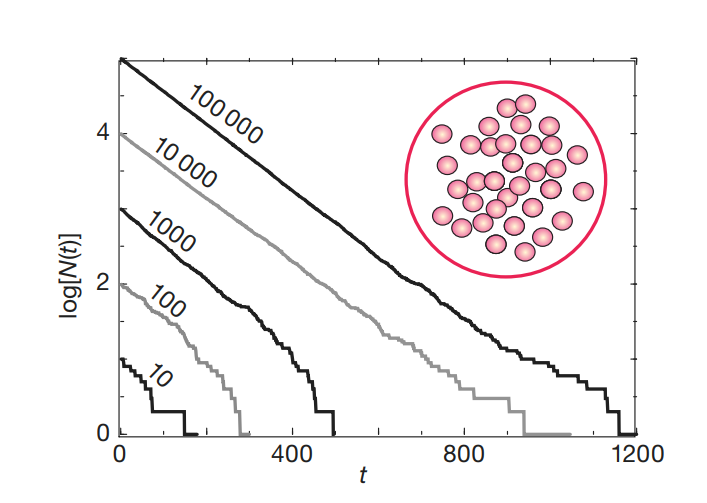

3. Create two plots, one showing that the slopes of $N(t)$ vs. $t$ are independent of $N(0)$ and another showing that the slopes are proportional to the value chosen for $\lambda$.

4. Create a plot showing that within the expected statistical variations, ln $N(t)$ and $\ln{\Delta{N}(t)}$ are proportional.

##### Additional Questions:

5. Explain in your own words how a process that is spontaneous and random at its very heart can lead to the exponential decay.
6. How does your simulation show that the decay is exponential-like and not a power law such as $N = \beta{t}^{-\alpha}$ ?


In [ ]:
# Decay.py, a spontaneous decay simulation.
# Adapted from 'Computational Physics 3rd ed. by R. Landau'

from vpython import * #import required packages
import numpy as np
import random
from math import *
import matplotlib.pyplot as plt


lambda1 = 0.01                                           # Decay constant
max = 500.;  time_max = 5000;   seed = 68111                       # Params
number = nloop = max                                      # Initial value
random.seed(seed)                               # Seed number generator

t=np.arange(0, time_max + 1)
n=[None]* len(t)
scene1=canvas()
graph1 = graph(canvas=scene1,background=vector(1,1,1),title ='Spontaneous Decay',xtitle='Time',ytitle='Number')

decayfunc = gcurve(color = color.green)

for time in arange(0, time_max + 1):                          # Time loop
    for atom in arange(1, number + 1 ):                      # Decay loop
        #finish the decay part of the loop by calling random.random and comparing
        #your random number to lambda and reducing a variable nloop by 1 if this
        #is the case.
    number = nloop 
    n[time]=number
    decayfunc.plot(pos=(time,number))
    rate(100)
    

In [ ]:
#n=np.log(n)
plt.plot(t, n)

plt.xlim(0, 550) 
#plt.xlim(5, 0)   # decreasing time

plt.xlabel('Time')
plt.ylabel('Number left')
plt.title('Spontaneous Decay')
#plt.grid(True)
plt.grid(False)

plt.show()